### Importing necesarry libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Loading Data and looking at a random sample

In [2]:
Train = pd.read_csv("d:/ML_Task/P4_training.csv",  sep=';') # Give path to your data set
Test = pd.read_csv("d:/ML_Task/P4_test.csv",  sep=';')

print("Train data shape :", Train.shape)
print("Test data shape :", Test.shape)

Train.sample(15)

Train data shape : (795, 60)
Test data shape : (91, 59)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,target
777,0.00,0.00,0.00,0.00,0.000,0.0,0.00,0.00,0.00,0.0,...,0.000,0.00,0.00,-0.815224,3,0.00,0.0,0.00,0.00,0
704,1.92,0.00,0.00,0.64,0.000,0.0,1.28,0.64,0.00,0.0,...,0.000,0.64,0.00,4.185061,8,0.00,0.0,2.56,0.00,0
143,0.00,0.00,0.76,0.00,289.000,0.0,0.00,0.30,0.15,0.0,...,57.000,0.00,0.00,-13.913914,84,0.00,0.0,0.61,1.23,1
564,0.00,0.00,0.00,0.00,0.000,0.0,0.00,3.57,0.00,0.0,...,0.000,1.78,0.00,14.600132,14,0.00,0.0,0.00,0.00,0
283,0.00,0.00,0.39,0.00,265.000,0.0,0.53,0.73,0.53,0.0,...,23.000,0.00,0.00,2.261751,272,0.00,0.0,1.12,0.26,1
73,0.00,0.00,0.11,0.00,134.000,0.0,1.92,1.81,0.45,0.0,...,57.000,0.00,0.00,-2.953061,94,0.00,0.0,0.45,0.22,1
787,0.00,9.83,0.00,0.00,0.000,0.0,0.00,0.00,0.00,0.0,...,0.000,0.00,0.00,0.275399,43,0.00,0.0,0.00,0.00,0
241,0.00,0.00,1.00,0.00,0.206,0.0,1.72,0.57,0.00,0.0,...,64.000,0.00,0.00,-12.373567,10,0.00,0.0,0.14,0.07,1
626,0.00,0.00,0.00,0.00,0.000,0.0,0.00,0.00,2.07,0.0,...,0.144,0.00,0.00,24.358820,11,0.00,0.0,0.00,0.00,0
494,0.00,0.00,0.00,0.74,0.160,0.0,0.24,0.00,0.24,0.0,...,0.000,0.49,0.00,0.805366,235,0.00,0.0,0.49,0.00,0


### Observations

 - 59 features
 - Data looks clean 
 - Numerical values
 - Binary classes in Output


 ### Examining Columns Type

In [3]:
Train.dtypes.value_counts()


float64    57
int64       3
dtype: int64

Numerical Data, looks good

### Checking for Null / Missing  Values

In [4]:
total = Train.isnull().sum().sort_values(ascending=False)
percent = (Train.isnull().sum()/Train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
target,0,0.0
feature_58,0,0.0
feature_27,0,0.0
feature_26,0,0.0
feature_25,0,0.0


No missing or null value 

### Exploring Data

In [5]:
Train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,target
count,795.000000,795.000000,795.000000,795.00000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,...,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000
mean,0.125459,0.179610,0.104352,0.15244,38.814557,0.019522,0.305333,0.571044,0.119132,0.040025,...,79.011787,0.661698,0.110855,2.812477,56.644025,0.087119,0.002704,0.223723,0.104377,0.377358
std,0.477084,1.303428,0.344301,0.45689,119.269707,0.292285,0.568487,0.861071,0.427586,0.332174,...,145.803109,1.662072,0.412888,11.746534,136.849686,0.487882,0.035248,0.478969,0.470212,0.485031
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-30.766937,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-4.768467,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.240000,0.000000,0.000000,...,0.112000,0.000000,0.000000,2.433046,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.00000,0.118000,0.000000,0.420000,0.815000,0.000000,0.000000,...,102.000000,0.395000,0.000000,10.527107,43.500000,0.000000,0.000000,0.230000,0.000000,1.000000
max,4.760000,12.800000,4.760000,4.54000,997.000000,7.400000,4.760000,5.880000,6.060000,7.140000,...,868.000000,15.380000,4.760000,47.691734,1325.000000,9.750000,0.740000,4.090000,9.090000,1.000000


- All features looks good
- Varied range of values for different features
- Data Scaling required

### Examine the Distribution of the Target label


In [6]:
Train['target'].value_counts()


0    495
1    300
Name: target, dtype: int64

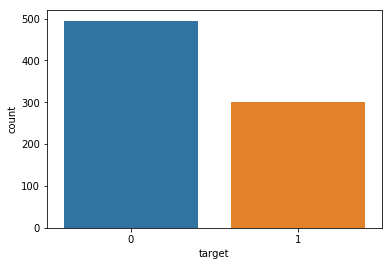

In [7]:
sns.countplot(Train['target'] )


Tagret output classes are unbalanced

In [8]:
# Find correlations with the target and sort
correlations = Train.corr()['target'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 feature_38    0.249239
feature_58    0.254503
feature_21    0.270120
feature_6     0.296073
feature_48    0.302771
feature_31    0.346781
feature_13    0.349462
feature_44    0.353551
feature_33    0.356435
feature_54    0.357321
feature_4     0.362389
feature_15    0.364226
feature_2     0.365430
feature_18    0.366951
target        1.000000
Name: target, dtype: float64

Most Negative Correlations:
 feature_51   -0.299270
feature_32   -0.260327
feature_3    -0.226490
feature_26   -0.201569
feature_0    -0.197939
feature_23   -0.188981
feature_36   -0.184462
feature_52   -0.153743
feature_29   -0.152982
feature_40   -0.150377
feature_46   -0.144150
feature_42   -0.139719
feature_10   -0.133449
feature_55   -0.127978
feature_14   -0.126383
Name: target, dtype: float64


We can see that feature_18, feature_2 and feature_15 are most positively correlated with target and feature_51, feature_32 and feature_3 is most negatively correlated with target

## Features Engineering
### Creating Polynomial Features

In [9]:
# Creating a dataframe for Polynomial features of seconf and third degree
polyfeatures = pd.DataFrame()

polyCols= [ "feature_18", "feature_2", "feature_15", "feature_51", "feature_32","feature_3"]

for cols in polyCols:
    Train[cols+"_sqr"] = Train[cols]**2
    Train[cols+"_cube"] = Train[cols]**3
    Test[cols+"_sqr"] = Test[cols]**2
    Test[cols+"_cube"] = Test[cols]**3

# Checking shape of newly created dataframes. Test should have 1less feature then trainas it doesnt have targete labels.

print("Train data shape :", Train.shape)
print("Test data shape :", Test.shape)

Train data shape : (795, 72)
Test data shape : (91, 71)


### Features Selection

In [10]:
X = Train.drop(["target"], axis=1)
y = Train["target"]

In [11]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(X.shape[1])

import lightgbm as lgb

# Create the model to evaluate feature importances
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [12]:
# Fit the model twice to avoid overfitting
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X, y, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.959774	valid_0's binary_logloss: 0.242861
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.969926	valid_0's binary_logloss: 0.207773


In [13]:
# Find high importance features

feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

,feature,importance
27,feature_27,46.0
18,feature_18,38.0
15,feature_15,37.5
53,feature_53,37.0
33,feature_33,35.5


In [14]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 34 features with 0.0 importance


,feature,importance
37,feature_37,0.0
39,feature_39,0.0
40,feature_40,0.0
41,feature_41,0.0
70,feature_3_cube,0.0


In [15]:
# Dropping the zero importance features

Train = Train.drop(columns = zero_features)
Test = Test.drop(columns = zero_features)


print('Training shape: ', Train.shape)
print('Testing shape: ', Test.shape)

Training shape:  (795, 38)
Testing shape:  (91, 37)


While dropping the featues all aour engineered polynomial fetures were also dropped hence the feautre engineering step was not really useful

##  Building Classifier Models

In [16]:
# dropping the labeled targets from the training data.
X = Train.drop(["target"], axis=1)
y = Train["target"]

# checking shape of data
print('Training shape: ', Train.shape)
print('Testing shape: ', Test.shape)

#Spiliting the data into train and validation set to evaluate the performance of our models.
X_train,X_valid,y_train,y_valid = train_test_split(X, y, test_size=0.3, random_state=7)

Training shape:  (795, 38)
Testing shape:  (91, 37)


### Scaling the features

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

#Applying feature scaling to Test data as well for prediction in future
Test_Scaled = scaler.transform(Test)

## XGBoost Classifier

In [18]:
# XGBoost Classifier
from xgboost import XGBClassifier

#Definig the model
model=XGBClassifier(max_depth=2, n_estimators=200,learning_rate=0.1)

#fitting the model
model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [19]:
# making predictions
y_pred=model.predict(X_valid_scaled)
print("Accuray of XGBoost classifier is ",accuracy_score(y_valid, y_pred)*100,"%")

Accuray of XGBoost classifier is  96.23430962343096 %


## Performance Metrics and Analysis

In [20]:
# Defining a function to plot ROC curve

from sklearn import metrics
def plotROC(target_test,test_preds):
    fpr, tpr, threshold = metrics.roc_curve(target_test, test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

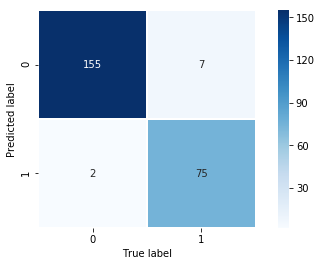

In [21]:
# Confusion Matrix
mat = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(8,4)) # increase size of the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True , 
            linewidth =0.5 , cmap="Blues")
plt.xlabel('True label')
plt.ylabel('Predicted label');


Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       157
           1       0.97      0.91      0.94        82

    accuracy                           0.96       239
   macro avg       0.97      0.95      0.96       239
weighted avg       0.96      0.96      0.96       239



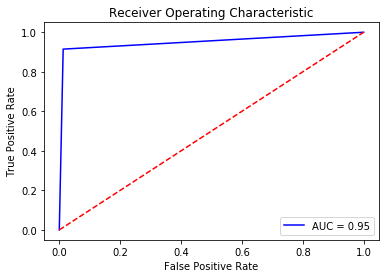

In [22]:
print("Classification Report \n",classification_report(y_valid, y_pred))
plotROC(y_valid, y_pred)

## SVM Classifier

In [23]:
from sklearn.svm import SVC  

#Defining the model
svclassifier = SVC(kernel='rbf')  # Using radial bias function kernel

#fitting the model
svclassifier.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
# predicting labels
y_pred_SVM = svclassifier.predict(X_valid_scaled)  
print("Accuracy of SVM classifier is ",accuracy_score(y_valid, y_pred_SVM)*100, "%")

Accuracy of SVM classifier is  94.14225941422593 %


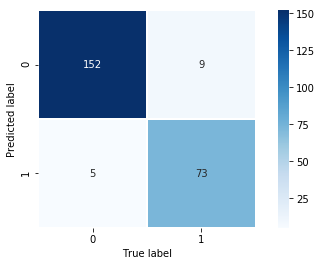

In [25]:
# Confusion Matrix
mat = confusion_matrix(y_valid, y_pred_SVM)

plt.figure(figsize=(8,4)) # increase size of the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True , 
            linewidth =0.5 , cmap="Blues")
plt.xlabel('True label')
plt.ylabel('Predicted label');

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       157
           1       0.94      0.89      0.91        82

    accuracy                           0.94       239
   macro avg       0.94      0.93      0.93       239
weighted avg       0.94      0.94      0.94       239



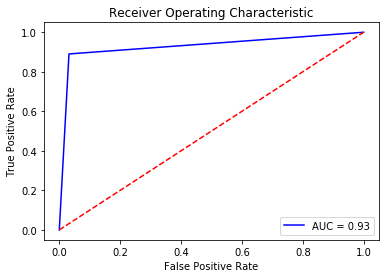

In [26]:
print("Classification Report \n",classification_report(y_valid, y_pred_SVM))
plotROC(y_valid, y_pred_SVM)

## Logistic Regression Classifier

In [27]:
from sklearn.linear_model import LogisticRegression

#Definig the model
logreg = LogisticRegression(solver='lbfgs')

#fitting the model
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# predicting labels
y_pred_logit = logreg.predict(X_valid_scaled)
print("Accuracy of logistic regression classifier on test set is ", accuracy_score( y_valid, y_pred_logit)*100 ,"%")

Accuracy of logistic regression classifier on test set is  92.88702928870293 %


Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       157
           1       0.92      0.87      0.89        82

    accuracy                           0.93       239
   macro avg       0.93      0.91      0.92       239
weighted avg       0.93      0.93      0.93       239



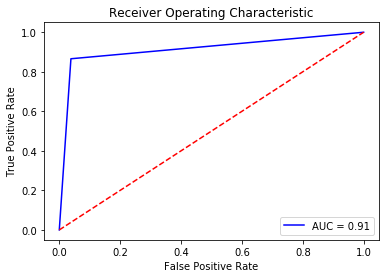

In [29]:
print("Classification Report \n",classification_report(y_valid, y_pred_logit))
plotROC(y_valid, y_pred_logit)

## Comparative analysis

### Precision, Recall and F-Score

#### Percision
The precision is defined as
$$ Precision = \frac{TP}{TP+FP} $$

it measures how "precise" our classifer is. Precision tells us how many of the items our classiger labeled correctly.

The denominator of percision is sum of first row of confusion matrix.

#### Recall
The recall (also called true positive rate, hitrate or sensitivity) is defined as
$$ Recall = \frac{TP}{TP+FN} $$

and measures how many of the "relevant" items we got. The term relevant refers to data points having the label 1.

The denominator of recall is sum of first column of confusion matrix.

#### F1-Score
The F1 score is defined as
$$ F1 = 2 * \frac {Precision * Recall} {Precision+Recall} $$

It is the harmonic mean of precision and recall.

|           |       Logistic Regression      |                    SVM                   |          XGBoost                |
|:---------:|:------------------------------:|:----------------------------------------:|:-------------------------------:|
|  Accuracy |              0.93              |                   0.94                   |               0.96              |
| Precision |              0.92 (class 1)    |                   0.94  (class 1)        |               0.97 (class 1)    |
|   Recall  |              0.87 (class 1)    |                   0.89  (class 1)        |               0.91 (class 1)    |
|  F1-Score |              0.89 (class 1)    |                   0.91  (class 1)        |               0.94 (class 1)    |
|    AUC    |              0.91              |                   0.93                   |               0.95              |


## Selected Model

Based on evaluation metrics we will choose XGBoost classifier  to predict the classes in test data as its performance is the best.

## Predecting target labels for Test data

In [30]:
Test_pred = model.predict(Test_Scaled) # we have already scaled test data and build and train our model

In [31]:
Test_pred = pd.DataFrame(Test_pred)

# Saving predicticted values to a csv file
Test_pred.to_csv("Test_Predicted_Labels.csv", sep = ";") 



# Q & As

###  Why did you choose the model that you chose?

The model(XGBoost - XGBClassifier) performed best among the different models tried. Its and ensembel model which uses boosting technique of classifying the labels using different classifier and data sample and using the majority vote to predict the final class labels. Hence its performance is better than the others. It also uses regularization hence reduce the chance of overfitting. Thats why I choose this model.

###  Why did you choose the evaluation metric you chose?

In machine learning there is no universal "best" model or "best" evaluation metric. There is the best model for your needs and use case. 

If you are searching for treasure (a scenario in which you have huge benefit from a true positive, not too high cost of a false positive) then recall is a good measure.

If you are trying to decide whether to perform a complex medical procedure on patient (high cost of false positive, hopefully a low cost of false negative), precision is the measure you should use.

Hence it changes from case to case depending upon domain and usage.

Since our output classes are imbalanced then it will not be advisible to just use the accuracy (as simpy predicting the majority class will leads to high accuracy). So I looked into a mix of metrics F1 score, recall,  precision (for minority class), AUC and Accuracy as well to decide about the performance of the model. For me the model having better recall, precision, F1 score for minority class is the better performing one. 

There is no information about the domain or use case of data so specific metrics for the needs or goal of classifier could not be selected.

### Do you think this task was reasonable as a test task?

Yes, it was a resonable task but not a challeging one as the data was really clean with no missing values or anomalies. For any ML task data prepration and future extraction is the most challenging part. In real life problems data would not be that well structured and free from anomalies.


### What problems did you face preparing a solution?
As there were no proper lable for feautres I can not determine the purpose of classification. Hence an extensive EDA could not be performed. I can not employ any domain specific knowledge for future engineering. Fine tuning the hyper parameter of XGBoost classifier was a little challenging. 


